# Happpiness Project

## Data: Preprocessing

First, let's import and inspect our datasets

In [1]:
import pandas as pd

df2015 = pd.read_csv('2015.csv')
df2016 = pd.read_csv('2016.csv')
df2017 = pd.read_csv('2017.csv')
df2018 = pd.read_csv('2018.csv')
df2019 = pd.read_csv('2019.csv')

In [2]:
# This code snippet will help us find any null values 
data_frames = {'2015': df2015, '2016': df2016, '2017': df2017, '2018': df2018, '2019': df2019}
for year, data in data_frames.items():
    print('For year ' + year)
    print((data.isnull().sum(axis=1) > 0).unique())

For year 2015
[False]
For year 2016
[False]
For year 2017
[False]
For year 2018
[False  True]
For year 2019
[False]


In [3]:
# Year 2018 has a null value somewhere -- let's investigate
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Data from year 2018 has one null value in the 'Perceptions of corruption' column. For now, we will ignore this. Next, let's inspect our dataframes and their contents

In [4]:
df2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [6]:
df2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [7]:
df2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [8]:
df2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

### Modify Columns: Create Universal Categories

We see that the columns/categories are not consistent over the years. We will modify our dataframes so that the categories will be consistent. This will allow us to combine our dataframes for ease of use. The columns we will use are:

Columns: Overall rank, Country or region, Happiness score, GDP per capita, Social support, Healthy life expectancy, Freedom, Generosity, Perceptions of corruption

In [9]:
# We will create dictionaries for each dataframe so that we can replace the column names 
# Categories are the same throughout the years (mostly), but the names differ 

cols2015 = {'Country': 'Country or region', 'Happiness Rank': 'Overall rank', 'Happiness Score': 'Happiness score',
            'Economy (GDP per Capita)': 'GDP per capita', 'Health (Life Expectancy)': 'Healthy life expectancy',
           'Family': 'Social support', 'Trust (Government Corruption)': 'Perceptions of corruption'}

cols2016 = {'Country': 'Country or region', 'Happiness Rank': 'Overall rank', 'Health (Life Expectancy)': 
            'Healthy life expectancy', 'Economy (GDP per Capita)': 'GDP per capita', 
            'Trust (Government Corruption)': 'Perceptions of corruption', 'Happiness Score': 'Happiness score', 
           'Family': 'Social support'}


cols2017 = {'Happiness.Rank': 'Overall rank', 'Country': 'Country or region', 'Happiness.Score': 'Happiness score',
           'Economy..GDP.per.Capita.': 'GDP per capita', 'Health..Life.Expectancy.': 'Healthy life expectancy',
           'Family': 'Social support', 'Trust..Government.Corruption.': 'Perceptions of corruption'}


cols2018 = {'Score': 'Happiness score', 'Freedom to make life choices': 'Freedom'}

cols2019 = {'Score': 'Happiness score', 'Freedom to make life choices': 'Freedom'}

In [10]:
# We will now rename all the columns for each dataframe 
df2015.rename(columns=cols2015, inplace=True)
df2016.rename(columns=cols2016, inplace=True)
df2017.rename(columns=cols2017, inplace=True)
df2018.rename(columns=cols2018, inplace=True)
df2019.rename(columns=cols2019, inplace=True)

In [11]:
# Now, we will create lists of columns that we wish to remove from our dataframes
# Columns that are inconsistent with other years/are no longer used will be removed
drop_cols2015 = ['Region', 'Standard Error', 'Dystopia Residual']
drop_cols2016 = ['Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual', 'Region']
drop_cols2017 = ['Whisker.high', 'Whisker.low', 'Dystopia.Residual']

In [12]:
# Remove columns & check dataframe (sanity check!)
for col in drop_cols2015:
    df2015.drop(col, axis=1, inplace=True)
df2015

,Country or region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [13]:
# Remove columns & check dataframe (sanity check!)
for col in drop_cols2016:
    df2016.drop(col, axis=1, inplace=True)
df2016

,Country or region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492
...,...,...,...,...,...,...,...,...,...
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397


In [14]:
# Remove columns & check dataframe (sanity check!)
for col in drop_cols2017:
    df2017.drop(col, axis=1, inplace=True)
df2017

,Country or region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612
...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148


In [15]:
# We will now add a column to identify the year -- this will be needed in a moment
df2015['Year'] = '2015'
df2016['Year'] = '2016'
df2017['Year'] = '2017'
df2018['Year'] = '2018'
df2019['Year'] = '2019'

In [16]:
# Finally, we will create one giant dataframe containing the data for years 2015-2019
# By giving the dataframes consistent column names, we will seamlessly concat the data
# The 'Year' column will help us to keep the years separate, if needed
df = pd.concat([df2015, df2016, df2017, df2018, df2019], axis=0)
df

,Country or region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
152,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
153,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
154,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


## Data: Relational Inspection

Now that we have our data contained, we will begin to look for relationships -- what categories affect the overall happiness ranking?

Our target variable will be the 'Happiness score'. As each country's Overall rank is determined by the Happiness score, we will use the score itself as our target variable, due to the relative nature of the overall rank.  

We will now investigate the relationship between 'Happiness score' and the rest of the categories (Country or region, GDP per capita, Social support, Healthy life expectancy, Freedom, Generosity, Perceptions of corruption). The Overall rank is a relative ranking based off of each copuntry's Happiness score, so it would be interesting to see if certain categories matter more than others.

In [17]:
# Let's create a correlation matrix and see which values have the strongest relationship to our target
corr_matrix = df.corr()
corr_matrix['Overall rank'].sort_values()

Happiness score             -0.992066
GDP per capita              -0.794791
Healthy life expectancy     -0.743655
Social support              -0.644842
Freedom                     -0.537942
Perceptions of corruption   -0.372781
Generosity                  -0.117713
Overall rank                 1.000000
Name: Overall rank, dtype: float64

In [18]:
# Let's also create a correlation matrix using Happiness score as our 'target'
# As Overall rank is determined by Happiness score, we should see similar (but inverse) results
corr_mat_happy = df.corr()
corr_mat_happy['Happiness score'].sort_values(ascending=False)

Happiness score              1.000000
GDP per capita               0.789284
Healthy life expectancy      0.742456
Social support               0.648799
Freedom                      0.551258
Perceptions of corruption    0.398418
Generosity                   0.137578
Overall rank                -0.992066
Name: Happiness score, dtype: float64

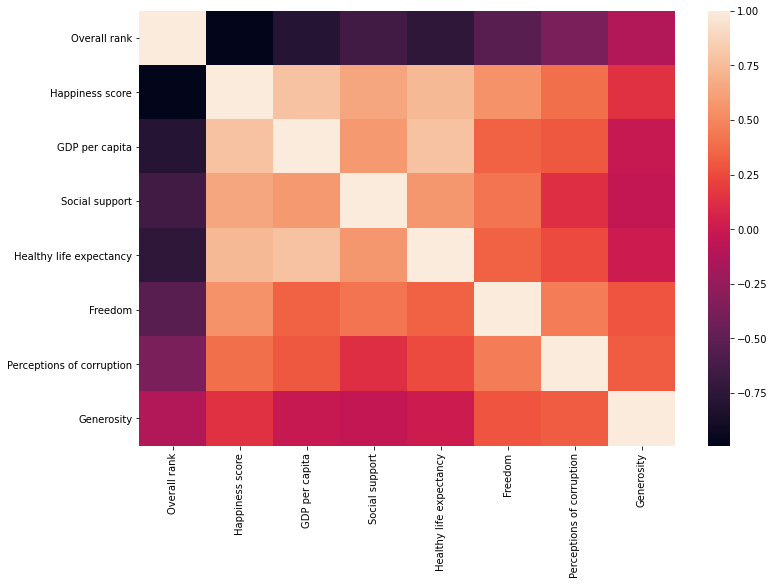

In [19]:
# For better visualization, we will use a heatmap to look at all of the relationships 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
corr_mat = df.corr()
sns.heatmap(corr_mat)
plt.show()

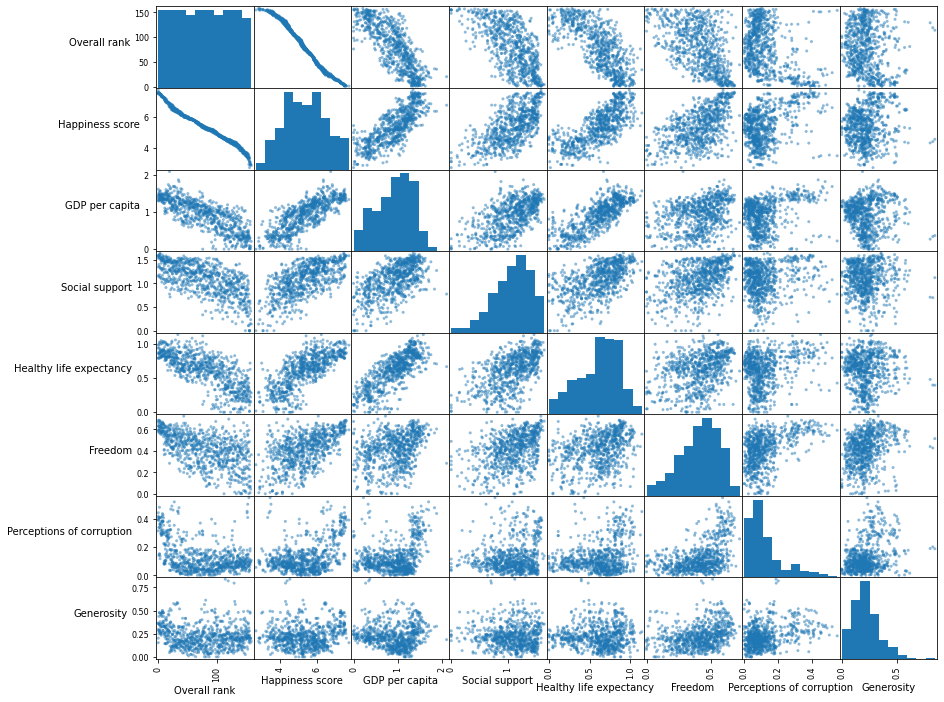

In [20]:
# Another way to visualize: scatter matrix!
from pandas.plotting import scatter_matrix

axes = scatter_matrix(df, figsize=(14, 12), alpha=0.5);
for ax in axes.flatten():
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# Model Creation & Training

We will now start working towards creating and training our model. In order to determine which algorithm will work best, we will compare a few different methods:

* Linear Regression
* Ridge Regression
* Lasso Regression
* Polynomial Regression

Our training data will be the data from years 2015-2018. We will test our model using the 2019 data. Our goal is to predict the Overall score (Happiness score) for each country based on their scores from the other categories (GDP per capita, Social support, Healthy life expectancy, Freedom, Generosity, Perceptions of corruption).

In order to compare the performance of the algorithms, we will use both Mean Squared Error and R^2.

In [21]:
# Let's take a peek at our dataset
df

,Country or region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
152,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
153,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
154,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


In [22]:
# To improve accuracy, we will standardize the data
from sklearn.preprocessing import StandardScaler

feature_df = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom', 
                 'Perceptions of corruption', 'Generosity']]
target_df = df[['Happiness score']]
scaled_features = StandardScaler().fit_transform(feature_df)
feature_df = pd.DataFrame(scaled_features, index=feature_df.index, columns=feature_df.columns)

## Linear Regression

We will start with Linear Regression for our model. We will analyze the performance using Mean Squared Error, as we can use this metric for all of our algorithms.

In [23]:
# We will first split our data into train/test sets
# The 2019 data begins at row 626, so we will use this index when dividing the data into train/test sets
from sklearn.linear_model import LinearRegression

# Don't forget about the null value we found earlier!
feature_df.fillna(0, inplace=True)
train_x = feature_df.iloc[0:626,:]
train_y = target_df.iloc[0:626,:]
test_x = feature_df.iloc[626:,:]
test_y = target_df.iloc[626:,:]

In [24]:
# Now to create & fit the model
reg = LinearRegression()
reg.fit(train_x, train_y)

LinearRegression()

In [25]:
# Let's see how this model performs
from sklearn.metrics import mean_squared_error

mean_squared_error(test_y, reg.predict(test_x))

0.30217211188102444

In [26]:
from sklearn.metrics import r2_score

r2_score(reg.predict(test_x), test_y)

0.6844155360084592

## Ridge Regression

Now, let's try using Ridge Regression. For now, we will arbitrarily select an alpha value for both Ridge and Lasso. Later, we will use GridSearchCV to determine the best parameters for each algorithm.

In [27]:
# Playing around with a few different alpha values, seeing best performance with alpha=0.1
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(train_x, train_y)
mean_squared_error(test_y, ridge.predict(test_x))

0.30217766192777606

In [28]:
r2_score(ridge.predict(test_x), test_y)

0.6843716916838207

## Lasso

As with Ridge, we will arbitrarily select an alpha value. 

In [29]:
# Seeing best performance with alpha=0.01
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(train_x, train_y)
mean_squared_error(test_y, lasso.predict(test_x))

0.3022325460735343

In [30]:
r2_score(lasso.predict(test_x), test_y)

0.6762525464892437

## Polynomial Regression

We saw earlier that some features are much more strongly correlated to our target variable than others. I am hoping that Polynomial Regression will take advantage of this fact and outperform the other algorithms.

In [31]:
# Seeing best performance with degree=2
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
trainx_poly = poly_reg.fit_transform(train_x)
testx_poly = poly_reg.transform(test_x)
lin_reg = LinearRegression()
lin_reg.fit(trainx_poly, train_y)
mean_squared_error(test_y, lin_reg.predict(testx_poly))

0.2878166391072067

In [32]:
r2_score(lin_reg.predict(testx_poly), test_y)

0.7308162602810642

In [33]:
hyp = lin_reg.predict(testx_poly)

In [34]:
countries = []
for i in range(626,636):
    countries.append(df.iloc[i,0])

In [35]:
countries

['Finland',
 'Denmark',
 'Norway',
 'Iceland',
 'Netherlands',
 'Switzerland',
 'Sweden',
 'New Zealand',
 'Canada',
 'Austria']

In [36]:
actual_df = pd.concat([df2019['Country or region'], test_y], axis=1)
pred_df = pd.concat([df2019['Country or region'], pd.DataFrame(hyp)], axis=1)
actual_df.iloc[0:11,0]

0         Finland
1         Denmark
2          Norway
3         Iceland
4     Netherlands
5     Switzerland
6          Sweden
7     New Zealand
8          Canada
9         Austria
10      Australia
Name: Country or region, dtype: object

In [37]:
pred_df.iloc[0:11,0]

0         Finland
1         Denmark
2          Norway
3         Iceland
4     Netherlands
5     Switzerland
6          Sweden
7     New Zealand
8          Canada
9         Austria
10      Australia
Name: Country or region, dtype: object

## Plot Findings: Polynomial Regression

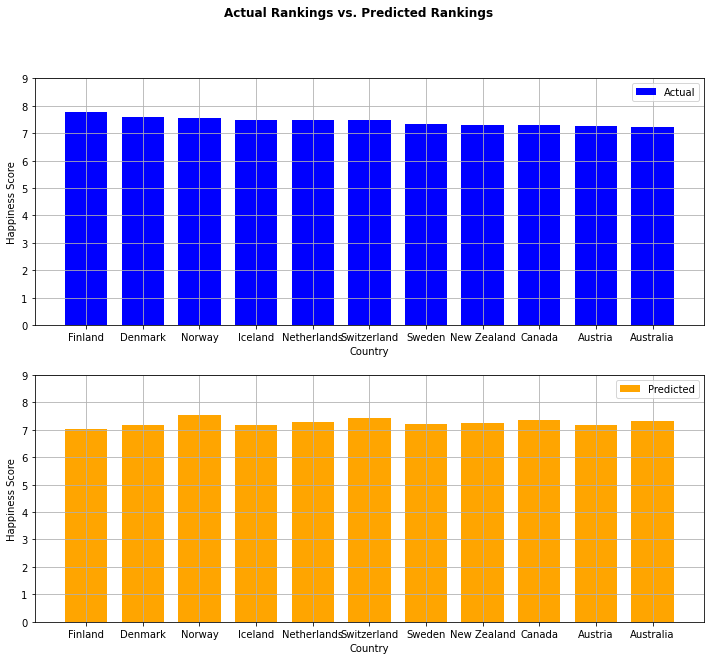

In [38]:
import numpy as np 

fig, (ax1, ax2) = plt.subplots(2, figsize=(12,10))
fig.suptitle('Actual Rankings vs. Predicted Rankings', weight='bold')
ax1.bar(actual_df.iloc[0:11,0], actual_df.iloc[0:11,1], width=0.75, color='blue', label='Actual')
ax2.bar(pred_df.iloc[0:11,0], pred_df.iloc[0:11,1], width=0.75, color='orange', label='Predicted')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.grid()
ax2.grid()
ax1.set_ylim(0,9)
ax2.set_ylim(0,9)
ax1.set_ylabel('Happiness Score')
ax1.set_xlabel('Country')
ax2.set_ylabel('Happiness Score')
ax2.set_xlabel('Country')
plt.show()

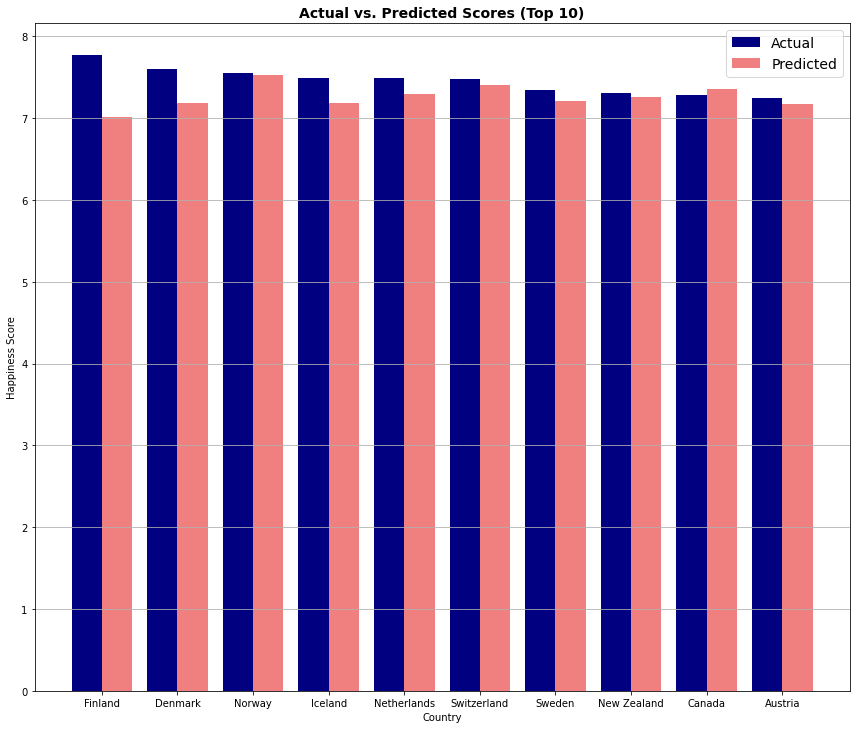

In [39]:
labels = countries
act_10 = actual_df.iloc[0:10,1]
pred_10 = pred_df.iloc[0:10,1]
x = np.arange(len(labels))
width = 0.4
fig, ax = plt.subplots(figsize=(12,10))
plt1 = ax.bar(x - 0.2, act_10, width, color='navy', label='Actual')
plt2 = ax.bar(x + 0.2, pred_10, width, color='lightcoral', label='Predicted')
ax.set_ylabel('Happiness Score')
ax.set_xlabel('Country')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best', fontsize=14)
ax.grid(axis='y')

fig.tight_layout()
plt.title('Actual vs. Predicted Scores (Top 10)', fontsize=14, weight='bold')
plt.show()

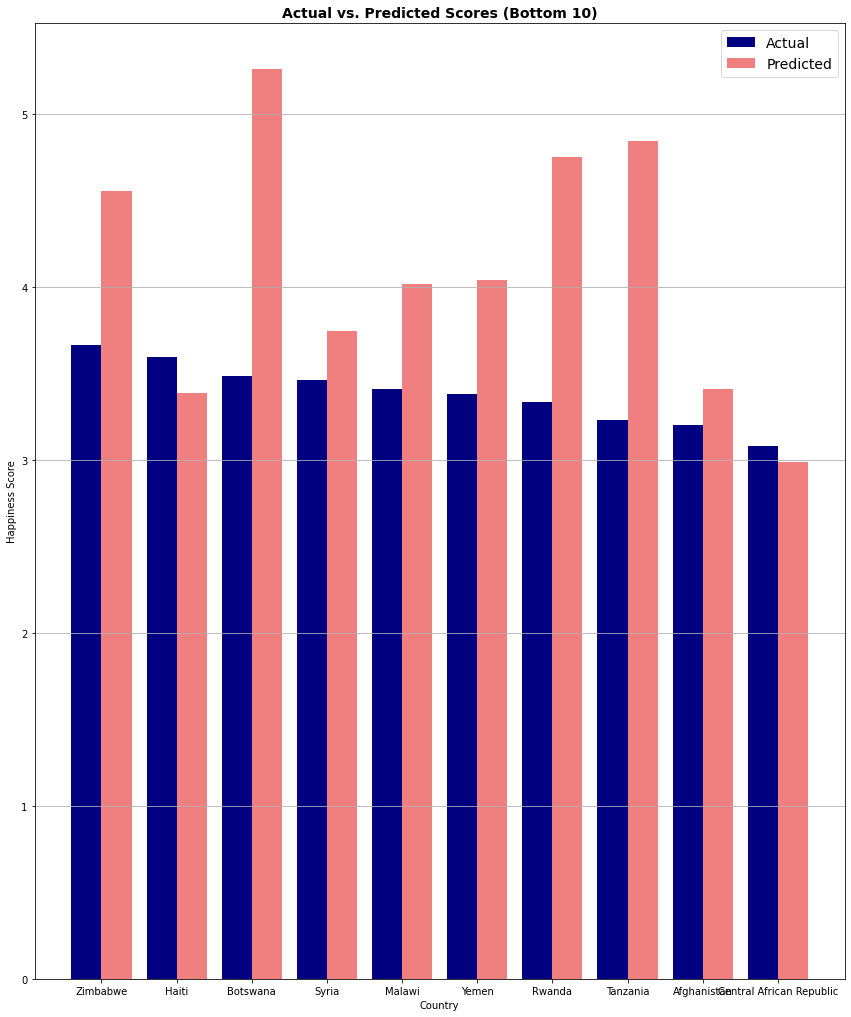

In [40]:
labels = list(pred_df.iloc[145:155,0])
act_10 = actual_df.iloc[145:155,1]
pred_10 = pred_df.iloc[145:155,1]
x = np.arange(len(labels))
width = 0.4
fig, ax = plt.subplots(figsize=(12,14))
plt1 = ax.bar(x - 0.2, act_10, width, color='navy', label='Actual')
plt2 = ax.bar(x + 0.2, pred_10, width, color='lightcoral', label='Predicted')
ax.set_ylabel('Happiness Score')
ax.set_xlabel('Country')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best', fontsize=14)
ax.grid(axis='y')

fig.tight_layout()
plt.title('Actual vs. Predicted Scores (Bottom 10)', fontsize=14, weight='bold')
plt.show()

In [41]:
pred_rankings = pred_df.sort_values(by=0, ascending=False)
actual_rankings = actual_df.sort_values(by='Happiness score', ascending=False)
pred_rankings

,Country or region,0
2,Norway,7.523505
5,Switzerland,7.410519
33,Singapore,7.386688
8,Canada,7.355473
10,Australia,7.332114
...,...,...
155,South Sudan,3.459697
144,Burundi,3.444346
153,Afghanistan,3.409058
146,Haiti,3.388369


In [42]:
actual_rankings

,Country or region,Happiness score
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488
...,...,...
151,Rwanda,3.334
152,Tanzania,3.231
153,Afghanistan,3.203
154,Central African Republic,3.083


In [43]:
df

,Country or region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
152,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
153,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
154,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


In [44]:
new_df = df.drop(columns=['Perceptions of corruption', 'Generosity', 'Year', 'Overall rank'])
new_df

,Country or region,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297
...,...,...,...,...,...,...
151,Rwanda,3.334,0.35900,0.71100,0.61400,0.55500
152,Tanzania,3.231,0.47600,0.88500,0.49900,0.41700
153,Afghanistan,3.203,0.35000,0.51700,0.36100,0.00000
154,Central African Republic,3.083,0.02600,0.00000,0.10500,0.22500


In [45]:
X = new_df.iloc[:,2:5]
Y = new_df.iloc[:,1]
scaled_features = StandardScaler().fit_transform(X)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

train_x = X.iloc[0:626,:]
train_y = Y.iloc[0:626]
test_x = X.iloc[626:,:]
test_y = Y.iloc[626:]

In [46]:
model = PolynomialFeatures(degree=2)
trainx_poly = model.fit_transform(train_x)
testx_poly = model.transform(test_x)
reg = LinearRegression()
reg.fit(trainx_poly, train_y)
mean_squared_error(test_y, reg.predict(testx_poly))

0.42643289906403264

In [47]:
r2_score(reg.predict(testx_poly), test_y)

0.6257435726214355

# More Data!

## World Giving Index Dataset

Dataset from Gallup Poll 2018

https://www.cafonline.org/docs/default-source/about-us-publications/caf_wgi2018_report_webnopw_2379a_261018.pdf%7Curl-status=live

In [50]:
giving2018_df = pd.read_csv('giving2018.csv', header=None)
giving2018_df

,0,1,2,3,4
0,Indonesia,1.0,97.0,2.0,1.0
1,Australia,2.0,24.0,3.0,6.0
2,New Zealand,3.0,21.0,5.0,5.0
3,United States of America,4.0,10.0,12.0,8.0
4,Ireland,5.0,25.0,9.0,7.0
...,...,...,...,...,...
142,Cambodia,140.0,144.0,55.0,142.0
143,Palestine (State of),141.0,124.0,138.0,129.0
144,China,142.0,135.0,113.0,133.0
145,Greece,143.0,128.0,137.0,136.0


In [51]:
giving2018_df.columns = ['Country', 'Overall Rank', 'Helping Strangers', 'Donating Money', 'Volunteering Time']
giving2018_df

,Country,Overall Rank,Helping Strangers,Donating Money,Volunteering Time
0,Indonesia,1.0,97.0,2.0,1.0
1,Australia,2.0,24.0,3.0,6.0
2,New Zealand,3.0,21.0,5.0,5.0
3,United States of America,4.0,10.0,12.0,8.0
4,Ireland,5.0,25.0,9.0,7.0
...,...,...,...,...,...
142,Cambodia,140.0,144.0,55.0,142.0
143,Palestine (State of),141.0,124.0,138.0,129.0
144,China,142.0,135.0,113.0,133.0
145,Greece,143.0,128.0,137.0,136.0


In [52]:
giving2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            147 non-null    object 
 1   Overall Rank       146 non-null    float64
 2   Helping Strangers  146 non-null    float64
 3   Donating Money     146 non-null    float64
 4   Volunteering Time  145 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [53]:
corr_mat = giving2018_df.corr()
corr_mat

,Overall Rank,Helping Strangers,Donating Money,Volunteering Time
Overall Rank,1.000000,0.700592,0.752122,0.795907
Helping Strangers,0.700592,1.000000,0.198950,0.470229
Donating Money,0.752122,0.198950,1.000000,0.478343
Volunteering Time,0.795907,0.470229,0.478343,1.000000


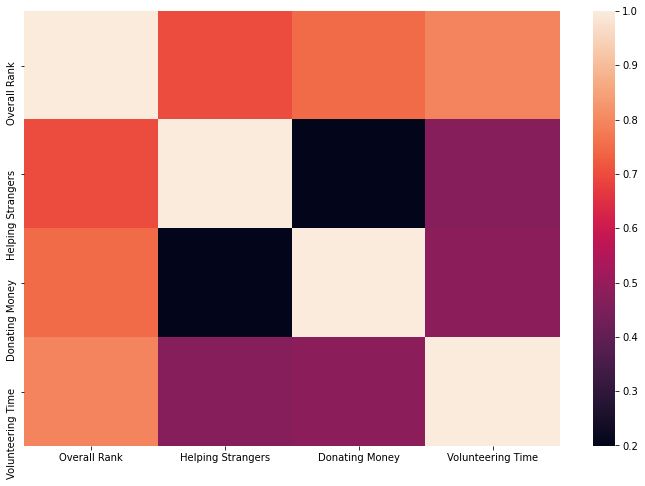

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat)
plt.show()

In [59]:
t10_df = giving2018_df.iloc[0:10,:]
top10g = list(t10_df['Country'])
t10_df = df2018.iloc[0:10,:]
top10h = list(t10_df['Country or region'])

In [68]:
for i in range(10):
    print('Rank '+  str(i)+ '-> Giving: ' + str(top10g[i])+ ', Happiness: '+ str(top10h[i]))

Rank 0-> Giving: Indonesia , Happiness: Finland
Rank 1-> Giving: Australia , Happiness: Norway
Rank 2-> Giving: New Zealand , Happiness: Denmark
Rank 3-> Giving: United States of America , Happiness: Iceland
Rank 4-> Giving: Ireland , Happiness: Switzerland
Rank 5-> Giving: United Kingdom , Happiness: Netherlands
Rank 6-> Giving: Singapore , Happiness: Canada
Rank 7-> Giving: Kenya , Happiness: New Zealand
Rank 8-> Giving: Myanmar , Happiness: Sweden
Rank 9-> Giving: Bahrain , Happiness: Australia


In [69]:
top10h

['Finland',
 'Norway',
 'Denmark',
 'Iceland',
 'Switzerland',
 'Netherlands',
 'Canada',
 'New Zealand',
 'Sweden',
 'Australia']

In [70]:
bottom10_df = giving2018_df.iloc[135:145,:]
bottom10 = list(bottom10_df['Country'])
bottom10

["Lao People's Democratic ",
 'Republic ',
 'Tunisia ',
 'Afghanistan ',
 'Latvia ',
 'Lithuania ',
 'Azerbaijan ',
 'Cambodia ',
 'Palestine (State of) ',
 'China ']

In [73]:
# Let's see the Happiness rankings for the #1 giving country, Indonesia
df.loc[df['Country or region'] == 'Indonesia']

,Country or region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Year
73,Indonesia,74,5.399,0.828270,1.087080,0.637930,0.466110,0.000000,0.515350,2015
78,Indonesia,79,5.314,0.951040,0.876250,0.493740,0.392370,0.003220,0.565210,2016
80,Indonesia,81,5.262,0.995539,1.274445,0.492346,0.443323,0.015317,0.611705,2017
95,Indonesia,96,5.093,0.899000,1.215000,0.522000,0.538000,0.018000,0.484000,2018
91,Indonesia,92,5.192,0.931000,1.203000,0.660000,0.491000,0.028000,0.498000,2019


In [74]:
# Now let's look at the data for the #1 happiest country, Finland
df.loc[df['Country or region'] == 'Finland']

,Country or region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Year
5,Finland,6,7.406,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2015
4,Finland,5,7.413,1.405980,1.134640,0.810910,0.571040,0.410040,0.254920,2016
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2017
0,Finland,1,7.632,1.305000,1.592000,0.874000,0.681000,0.393000,0.202000,2018
0,Finland,1,7.769,1.340000,1.587000,0.986000,0.596000,0.393000,0.153000,2019


In [75]:
countries_giving = list(giving2018_df['Country'].unique())
countries_2018 = list(df2018['Country or region'].unique())

In [76]:
len(countries_giving)

147

In [77]:
len(countries_2018)

156

## Engineering Features

Taking data from the 2015-2018 World Giving Reports, along with our data from the 2015-2018 World Happiness Reports, we will engineer new features to be used in our predictor model. We will inspect this data, look for any patterns/correlations, and then see if we can use any of the previously explored models to predict.

In [81]:
cols = ['Country', 'Overall Rank', 'Helping Strangers', 'Donating Money', 'Volunteering Time']
giving2017_df = pd.read_csv('giving2017.csv', header=None)
giving2017_df.columns = cols
giving2016_df = pd.read_csv('giving2016.csv', header=None)
giving2016_df.columns = cols
giving2015_df = pd.read_csv('giving2015.csv', header=None)
giving2015_df.columns = cols

In [84]:
giving2018_df.head()

,Country,Overall Rank,Helping Strangers,Donating Money,Volunteering Time
0,Indonesia,1.0,97.0,2.0,1.0
1,Australia,2.0,24.0,3.0,6.0
2,New Zealand,3.0,21.0,5.0,5.0
3,United States of America,4.0,10.0,12.0,8.0
4,Ireland,5.0,25.0,9.0,7.0


In [85]:
giving2017_df.head()

,Country,Overall Rank,Helping Strangers,Donating Money,Volunteering Time
0,Myanmar,1.0,57.0,1.0,3.0
1,Indonesia,2.0,76.0,2.0,1.0
2,Kenya,3.0,4.0,20.0,2.0
3,New Zealand,4.0,21.0,6.0,6.0
4,United States of America,5.0,7.0,13.0,7.0


In [86]:
giving2016_df.head()

,Country,Overall Rank,Helping Strangers,Donating Money,Volunteering Time
0,Myanmar,1.0,27.0,1.0,2.0
1,United States of America,2.0,9.0,13.0,5.0
2,Australia,3.0,14.0,3.0,11.0
3,New Zealand,4.0,31.0,5.0,6.0
4,Sri Lanka,5.0,36.0,17.0,4.0


In [87]:
giving2015_df.head()

,Country,Overall Rank,Helping Strangers,Donating Money,Volunteering Time
0,Myanmar,1.0,47.0,1.0,1.0
1,United States of America,2.0,3.0,12.0,6.0
2,New Zealand,3.0,22.0,6.0,4.0
3,Canada,4.0,14.0,10.0,5.0
4,Australia,5.0,21.0,7.0,12.0
